In [12]:

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

load_dotenv()

True

# Transaction Classification based on Merchant

In [2]:
url = "https://api.ai71.ai/v1/chat/completions"
AI71_TOKEN = os.getenv('AI71_TOKEN')
role_content = "You will be provided with a company name, and your task is to classify it to fitness, food, healthcare, clothing, transportation, fun, utilities, personal care, shopping, miscellaneous"
user_content = "CLASSPASS* MONTHLY CLASSPASSCOM"

payload = json.dumps({
  "model": "tiiuae/falcon-180b-chat",
  "messages": [
    {
      "role": "system",
      "content": role_content
    },
    {
      "role": "user",
      "content": user_content
    }
  ]
})
headers = {
  'Content-Type': 'application/json',
  'Authorization': f'Bearer {AI71_TOKEN}'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)

{"id":"RequestType.CHAT_COMPLETION-tiiuae/falcon-180b-chat-2ffbf6db-b047-4dab-b09c-bfd60696f919-api71-api-2ffbf6db-b047-4dab-b09c-bfd60696f919-386da3f1-2892-4842-b2bd-444a68a77ec6","created":1722077525,"model":"tiiuae/falcon-180b-chat","usage":{"completion_tokens":2,"prompt_tokens":60,"total_tokens":62},"choices":[{"finish_reason":"stop","index":0,"message":{"content":" Fitness","role":"assistant"}}],"object":"chat.completion"}


In [3]:
try:
    response_json = response.json()
    choices = response_json.get('choices', [])
    if choices:
        message_content = choices[0].get('message', {}).get('content', '')
        print(f'Classification Result: {message_content.strip()}')
    else:
        print("No choices found in the response.")
        
except ValueError:
    print("Response is not in JSON format:")
    print(response.text)

Classification Result: Fitness


### Classify Bank Transactions

In [4]:
df = pd.read_csv('../data/sample_transactions.csv')
df.head()

,Date,Description,Merchant,Amount
0,07 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,8.70
1,07 Jul 2024,CARD NO.4439********1246 AL AQSA GAR AND BLANK...,AL AQSA GAR AND BLANKE,85.00
2,07 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,31.55
3,05 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,31.39
4,05 Jul 2024,CARD NO.4439********1246 Talabat DUBAI:AE 0835...,Talabat,139.63


In [5]:
import os
import json
import requests

def classify_company(user_content):
    url = "https://api.ai71.ai/v1/chat/completions"
    AI71_TOKEN = os.getenv('AI71_TOKEN')

    categories = [
    'fitness',
    'groceries',
    'restaurants and cafes',
    'healthcare', 
    'clothing',
    'jewelry',
    'transportation',
    'phone and internet', 
    'miscellaneous',
    'others',
    'e-commerce',
    'food delivery'
    ]

    categories_str = ', '.join(categories)

    role_content = (
        f"You will be provided with a company name, and your task is to classify it to one of the following "
        f"{categories_str}"
    )
    
    payload = json.dumps({
        "model": "tiiuae/falcon-180b-chat",
        "messages": [
            {
                "role": "system",
                "content": role_content
            },
            {
                "role": "user",
                "content": user_content
            }
        ]
    })
    
    headers = {
        'Content-Type': 'application/json',
        'Authorization': f'Bearer {AI71_TOKEN}'
    }
    
    response = requests.post(url, headers=headers, data=payload)

    try:
        response_json = response.json()
        choices = response_json.get('choices', [])
        if choices:
            result = choices[0].get('message', {}).get('content', '').strip()
            return result
        else:
            return None
            
    except ValueError:
        return None

 
classify_company("CLASSPASS* MONTHLY CLASSPASSCOM")

'Fitness'

In [6]:
df['Category_freetext'] = df['Merchant'].apply(classify_company)

In [7]:
df

,Date,Description,Merchant,Amount,Category_freetext
0,07 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,8.70,groceries
1,07 Jul 2024,CARD NO.4439********1246 AL AQSA GAR AND BLANK...,AL AQSA GAR AND BLANKE,85.00,Clothing
2,07 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,31.55,groceries
3,05 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,31.39,groceries
4,05 Jul 2024,CARD NO.4439********1246 Talabat DUBAI:AE 0835...,Talabat,139.63,Food delivery
5,05 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,50.98,groceries
6,04 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,17.25,groceries
7,03 Jul 2024,CARD NO.4439********1246 Talabat DUBAI:AE 6897...,Talabat,66.04,Food delivery
8,03 Jul 2024,CARD NO.4439********1246 Amazon.ae Dubai:AE 50...,Amazon.ae,175.25,E-commerce
9,02 Jul 2024,CARD NO.4439********1246 UNION COOP DUBAI:AE 2...,UNION COOP,5.50,groceries


### Standarize the Category

In [8]:
categories = ['fitness', 'groceries', 'restaurants and cafes', 'healthcare', 'clothing', 'jewelry', 
         'transportation', 'phone and internet', 'miscellaneous', 'others', 'e-commerce', 'food delivery']

def find_first_match(text, categories ):
    for category in categories :
        if category in text.lower():
            return category
    return None

df['Category'] = df['Category_freetext'].apply(lambda x: find_first_match(x, categories))
df


,Date,Description,Merchant,Amount,Category_freetext,Category
0,07 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,8.70,groceries,groceries
1,07 Jul 2024,CARD NO.4439********1246 AL AQSA GAR AND BLANK...,AL AQSA GAR AND BLANKE,85.00,Clothing,clothing
2,07 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,31.55,groceries,groceries
3,05 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,31.39,groceries,groceries
4,05 Jul 2024,CARD NO.4439********1246 Talabat DUBAI:AE 0835...,Talabat,139.63,Food delivery,food delivery
5,05 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,50.98,groceries,groceries
6,04 Jul 2024,CARD NO.4439********1246 NESTO HYPERMARKET LLC...,NESTO HYPERMARKET LLC BRA,17.25,groceries,groceries
7,03 Jul 2024,CARD NO.4439********1246 Talabat DUBAI:AE 6897...,Talabat,66.04,Food delivery,food delivery
8,03 Jul 2024,CARD NO.4439********1246 Amazon.ae Dubai:AE 50...,Amazon.ae,175.25,E-commerce,e-commerce
9,02 Jul 2024,CARD NO.4439********1246 UNION COOP DUBAI:AE 2...,UNION COOP,5.50,groceries,groceries


## Analytics

Summary Report:
Total Spending: $1241.54

Monthly Spending Summary:
     Month   Amount
0  2024-07  1241.54

Top Spenders by Merchant:
                   Merchant  Amount
4                 Swarovski  581.00
5                   Talabat  205.67
1                 Amazon.ae  175.25
3     NESTO HYPERMARKET LLC  139.87
0  AL AQSA GAR AND BLANK...   85.00
2                 BREW CAFE   35.00
6                UNION COOP   19.75

Category Summary:
                Category  Amount
0               clothing   85.00
1             e-commerce  175.25
2          food delivery  205.67
3              groceries  159.62
4                jewelry  581.00
5  restaurants and cafes   35.00


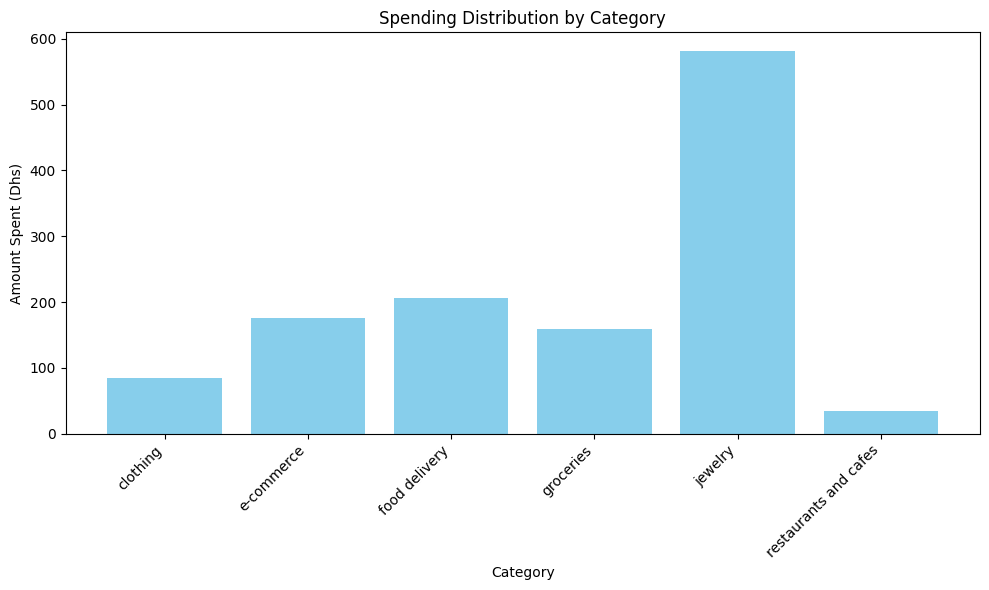

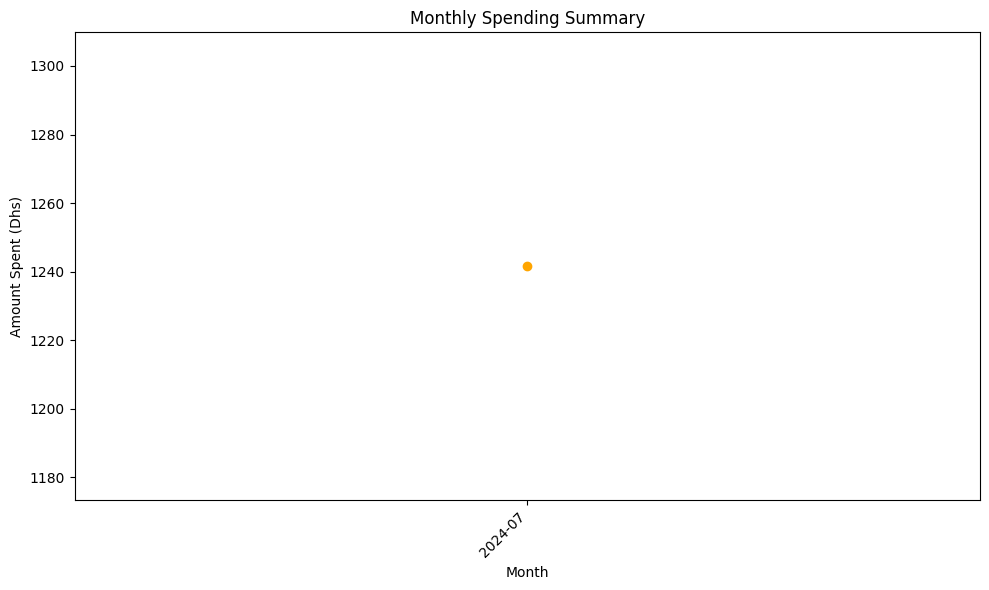

In [15]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y')

# Monthly spending summary
df['Month'] = df['Date'].dt.to_period('M')
monthly_summary = df.groupby('Month')['Amount'].sum().reset_index()

# Top spenders by merchant
merchant_summary = df.groupby('Merchant')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Category spending distribution
category_summary = df.groupby('Category')['Amount'].sum().reset_index()

# Calculate overall total spending
total_spending = df['Amount'].sum()

# Summary report
report = {
    'Total Spending': total_spending,
    'Monthly Spending Summary': monthly_summary,
    'Top Spenders by Merchant': merchant_summary,
    'Category Summary': category_summary
}

# Print the summary report
print("Summary Report:")
print(f"Total Spending: ${report['Total Spending']:.2f}")
print("\nMonthly Spending Summary:")
print(report['Monthly Spending Summary'])
print("\nTop Spenders by Merchant:")
print(report['Top Spenders by Merchant'])
print("\nCategory Summary:")
print(report['Category Summary'])

# Plot Category Spending Distribution
plt.figure(figsize=(10, 6))
plt.bar(report['Category Summary']['Category'], report['Category Summary']['Amount'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Amount Spent (Dhs)')
plt.title('Spending Distribution by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Monthly Spending Summary
plt.figure(figsize=(10, 6))
plt.plot(report['Monthly Spending Summary']['Month'].astype(str), report['Monthly Spending Summary']['Amount'], marker='o', linestyle='-', color='orange')
plt.xlabel('Month')
plt.ylabel('Amount Spent (Dhs)')
plt.title('Monthly Spending Summary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
